<a href="https://colab.research.google.com/github/hannahchapmanmurdock/Data-Analytics/blob/main/A3_Hannah_Chapman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Working with data

**Rationale**. In this assignment, you will practice reading/writing common dataset formats, execute conditional subsetting of data, merge data, and perform groupby summaries. 

Please comment your code for potential partial credit and to explain to me that you understand what you are doing. As always, feel free to add additional cells.

For any questions that requires a **text answer: make sure to type your answers in a text cell.**

(Make sure you've ) Save(d) the [datasets](https://drive.google.com/drive/folders/1wpphG0kRidK8W9DT79spBufId8jWCUvC?usp=sharing) in this folder to your Google Drive.

1. [Quebec Yelp Reviews](https://drive.google.com/file/d/1pmnps16-kI8VJaIizNXaOFyW0IZs_pZo/view?usp=sharing)
1.  [Quebec Business Info](https://drive.google.com/file/d/1eT72WiYI7xXT7wiNfo2w1uhxVC0qIage/view?usp=sharing)


In [ ]:
# first, mount your GDrive
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Problem 1 (2 points)

Read in the Quebec Yelp dataset from your Google Drive. Make sure that there are no "Unnamed" columns - if so, you've read in the index_col as a regular column. Make sure that the index corresponds to the row of the dataset using the `.reset_index` method. Convert "Date" column to a Pandas datetime format.

1. What is the observational unit of this dataset? (What does each row represent?)
1. How many rows are in this dataset? columns?
1. When was the earliest review written? latest?

## Problem 1 Answers (edit this cell)

1. Each row represents one **_____review____**.
1. There are **____208,166_____** rows in the dataset
    1. There are **___9__** columns in the dataset excluding the index.
1. The first review is written on **_____12/29/2013____**.
    1. The last review is written on **___05/05/2019____**.

In [ ]:
# import any necessary libraries here
import pandas as pd
import os
os.listdir('drive/My Drive')


['Getting started.pdf',
 'Hannah Chapman.gsheet',
 'JQ 4.gdoc',
 'Short Essay 1.gdoc',
 'Untitled document (4).gdoc',
 'Journal Question 6.gdoc',
 'Week 8 JQ.gdoc',
 'Week 9 JQ.gdoc',
 'JQ: Kierkegard.gdoc',
 'Untitled document (3).gdoc',
 'Essay 2 Outline Rought Draft.gdoc',
 'Untitled document (2).gdoc',
 'Essay 2.gdoc',
 'Untitled document (1).gdoc',
 'Chagnon Debate.gdoc',
 'Essay 2 - For reals this time.gdoc',
 'Outline rough draft.gdoc',
 'Outline Final Draft.gdoc',
 'Final Draft of Essay 2.gdoc',
 'Abstract (1).gdoc',
 'Sources for Final Essay.gdoc',
 'Outline for Final Essay.gdoc',
 'Concert Attendance.gdoc',
 'Concert Review 1.gdoc',
 'Concert Review 2.gdoc',
 'Concert Review 3.gdoc',
 'Reflection Paper - Nutiriton.gdoc',
 'Final Essay Outline.gdoc',
 'Annotated Bibliography.gdoc',
 'Untitled document.gdoc',
 'Abstract.gdoc',
 'Module 5 Assignment.gdoc',
 'LM 1010 Module 6 Assignment.gdoc',
 'ANLY 4100',
 'MKTG3509',
 'Colab Notebooks',
 'Combining Datasets.ipynb']

In [ ]:
# First, list the folder containing your data
# fpath = 'path/to/your/data'
# os.listdir(fpath) 
# this should return a list containing the quebec_biz 
# and quebec_yelp_reviews datasets

os.listdir('drive/My Drive/ANLY 4100/Data Sets')


['Datasets-20220920T155502Z-001.zip',
 'avocado_prices.zip',
 'retail_data.zip',
 'avocado_prices',
 'retail_data',
 'assignment 3 data-20221009T004056Z-001.zip',
 'quebec_biz.csv',
 'quebec_yelp_reviews.csv',
 'assignment 3 data']

In [ ]:
# read in the reviews data
# pick a variable name for the reviews dataframe
# and set its value by reading in the appropriate dataset
# df = pd.read_csv(fpath + 'review_dataset_filename.csv', index_col = 0)
# you can call the dataframe something other than df

reviews = pd.read_csv('drive/My Drive/ANLY 4100/Data Sets/quebec_yelp_reviews.csv', index_col = 0)
reviews.reset_index(drop = True, inplace = True) 

In [ ]:
# preview the dataframe's first 5 rows using the .head() method
# what unit of observation does each row represent?
reviews.head()



,review_id,user_id,business_id,useful,funny,cool,text,date,stars
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2


Each row represents one yelp review

In [ ]:
# compute the shape of the dataset to return (rows, columns)
# use the .shape method
reviews.shape


(208166, 9)

In [ ]:
# take a look at the column names by accessing the dataframe's column attribute, 
# e.g. df.columns.values (but replace df with the name you picked)

reviews.columns.values


array(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date', 'stars'], dtype=object)

In [ ]:
# find the date column above, convert the column to pandas datetime series
# using the pd.to_datetime(....) function
reviews.date.dtype
reviews['strdate'] = reviews.date.astype(str)
reviews['Date'] = pd.to_datetime(reviews.strdate)




In [ ]:
# find the smallest date (use the .min method)

reviews.Date.min()


Timestamp('2007-01-02 00:00:00')

In [ ]:
# find the largest date (use the .max method)

reviews.Date.max()



Timestamp('2019-12-13 00:00:00')

# Problem 2 (2 points)

Construct a **new** dataframe by selecting only the reviews written 1) on or after May 1st 2016 **and** 2) before June 1st 2019. **Save it** to an appropriate location on your Google Drive. (feel free to delete it later)

In [ ]:
# pick a variable name and set it equal to the approriate subset of your dataframe
# (you can use the same variable name as the original dataframe)
# remember to select the dates with 2 conditions:
# >= '2016/5/1'
# < '2019/6/1'

reviews = reviews.loc[(reviews['Date'] >= '2016-05-01') & (reviews['Date'] < '2019-06-01')]



In [ ]:
# check the minimum and maximum dates of the resulting dataframe to confirm you've done this correctly
# min date

reviews.Date.min()



Timestamp('2016-05-01 00:00:00')

In [ ]:
# max date
reviews.Date.max()




Timestamp('2019-05-31 00:00:00')

In [ ]:
# save the dataset somewhere, give it a meaningful file name





# Problem 3 (3 points)

**Use the dataset created in problem 2**

Create a new column `ym` that represents the year and month (drops date and time from dates).\
*Hint use `.dt.to_period` method from [notes](https://colab.research.google.com/drive/1RKy2g2aWOitE2rCQdZli8ERKdrtqU6Cl?usp=sharing).

Next, construct a line plot of the average usefulness votes (y-axis) by month between 2016/5 and 2019/5 `ym` (x-axis).\
*Hint - you need to do a groupby plot grouping on `ym` and compute the mean of star ratings.

### Use a text cell to answer:
1. What seasonal patterns do you see in the average helpfulness votes per review in Quebec? 
1. Come up with 2 potential explanations for the pattern(s) you've noticed.

## Problem 3 Answer (edit this cell)
1. (Describe the pattern)
1. (Speculate why this pattern might exist)

1. Summer months seem to yield better reviews than colder months in Quebec
1. Perhaps the cold weather puts the people of Quebec in a worse mood. Also, in the cold months there is probably less going on and people are staying inside more, thus there is less opportunity to leave reviews.

In [ ]:
# create 'ym' column
reviews['ym'] = reviews.Date.dt.to_period('M')




In [ ]:
# check that you've created it correctly by finding the unique values of ym
# select the ym column and use the .unique() method
reviews['ym'].unique()




<PeriodArray>
['2016-07', '2016-09', '2018-09', '2017-05', '2017-06', '2017-07', '2016-05',
 '2018-08', '2017-08', '2017-10', '2016-10', '2018-07', '2016-08', '2016-06',
 '2017-04', '2017-01', '2018-06', '2018-02', '2018-05', '2017-09', '2018-04',
 '2018-03', '2016-12', '2016-11', '2017-02', '2017-11', '2017-03', '2018-01',
 '2018-10', '2017-12', '2019-01', '2018-12', '2018-11', '2019-04', '2019-03',
 '2019-02', '2019-05']
Length: 37, dtype: period[M]

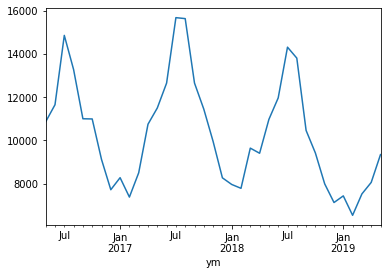

In [ ]:
# create the plot using a groupby summary + .plot method
# refer to notes for examples

reviews.groupby(['ym'])['stars'].sum().plot()



# Probelm 4 (4 points)

Read in the Quebec **business info** dataset, be sure to use a different variable name for this dataframe.

## Part A questions (2 pts)
1. What is the observational unit of this dataset?
1. On what variable should you merge this (right dataframe) **into** the review data (left dataframe)? 

**Merge business data into the dataframe from Q2.**

Notice a column called "is_open" - if a business has shut down, this column will have a value of 0, otherwise it will have a value of 1.

Construct the line plot where: 
* x-axis is `ym` 
* y-axis is average star rating 
* there are 2 lines: 1. for currently open businesses and 2. closed businesses 
    * Make sure the 2 lines appear on the same figure.
    * You should compute avg. star rating using the `star` variable, not the `biz_star` variable.

## Part B questions (2 pts)
1. Any difference in patterns between these 2 groups of businesses?
1. Speculate on what reason(s) might cause the observed pattern(s).



## Problem 4 Answers (Edit this cell)

### Part A

1. Each row represents one **____business/location_____**
1. We should merge on **____left_____**

### Part B

1. (Describe any difference in patterns between currently open and shut down businesses)
  It looks like the lower the stars, the more likely the business is to be out of business or to have fewer hours open.
1. 2 possible reasons are:
    1. (Clearly explain one hypothesized reason)
    If the reviews are not very good, then people may not want to visit the business as often.
    1. (Clearly explain a second hypothesized reason)
    If there are not as many reviews, people may be wary to visit an establishment about which they have little information.

In [ ]:
# read in the business info file, call the dataframe biz, e.g. biz = pd.read_csv(...)

biz = pd.read_csv('drive/My Drive/ANLY 4100/Data Sets/quebec_biz.csv', index_col = 0)


In [ ]:
# Take a look at the first few rows to determine the observational unit

biz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
31,pcaQDBM6r0PWTXfYZK6RdA,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,3.0,6,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Grocery","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
43,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN
45,_xOeoXfPUQTNlUAhXl32ug,Starbucks,150 Boulevard Crémazie E,Montréal,QC,H2P 1E2,45.542993,-73.640218,3.5,4,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Coffee & Tea, Food","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
57,3BfGGIJn8lxvu1k3ZZnL1w,Théâtre Corona,2490 Rue Notre-Dame O,Montréal,QC,H3J 1N5,45.482777,-73.575006,4.0,18,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",NaN


In [ ]:
# merge the 2 datasets
reviews = reviews.merge(biz, how = 'left', on = 'business_id')



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'longitude_x', 'categories_x', 'hours_x', 'biz_stars_x', 'is_open_x', 'address_x', 'name_x', 'latitude_x', 'postal_code_x', 'review_count_x', 'attributes_x', 'city_x', 'state_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [ ]:
# take a look at the columns of the resulting dataframe
# make sure it has all the columns from both the review and business datasets
reviews.head()



,business_id,name_x,address_x,city_x,state_x,postal_code_x,latitude_x,longitude_x,biz_stars_x,review_count_x,...,state_y,postal_code_y,latitude_y,longitude_y,biz_stars_y,review_count_y,is_open_y,attributes_y,categories_y,hours_y
0,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,...,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
1,pcaQDBM6r0PWTXfYZK6RdA,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,3.0,6,...,QC,H8P 1B4,45.425645,-73.611934,3.0,6,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Grocery","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
2,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,...,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN
3,_xOeoXfPUQTNlUAhXl32ug,Starbucks,150 Boulevard Crémazie E,Montréal,QC,H2P 1E2,45.542993,-73.640218,3.5,4,...,QC,H2P 1E2,45.542993,-73.640218,3.5,4,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Coffee & Tea, Food","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
4,3BfGGIJn8lxvu1k3ZZnL1w,Théâtre Corona,2490 Rue Notre-Dame O,Montréal,QC,H3J 1N5,45.482777,-73.575006,4.0,18,...,QC,H3J 1N5,45.482777,-73.575006,4.0,18,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",NaN


In [ ]:
# make your plot, use groupby summary and unstack syntax 
# to construct plot, see examples from notes

reviews.groupby(['biz_stars_y'])['is_open_y'].sum().unstack('biz_stars_y').plot()



ValueError: ignored